f(1.342) = 4.353349236934999
f(1.386) = 4.356634589332862


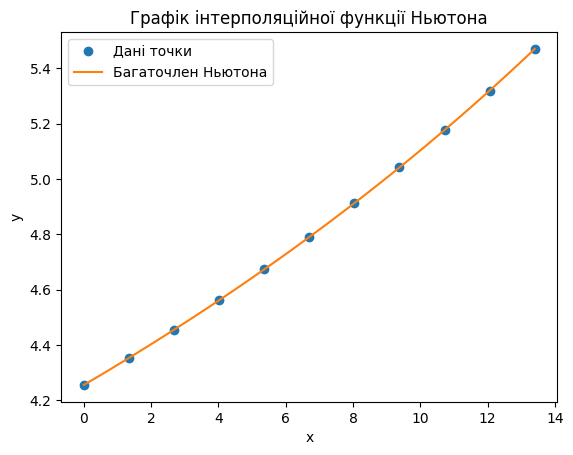

In [13]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Задані точки
x = np.array([i * 1.340 for i in range(11)])  # Задаємо x генератором списків
y = np.array([4.2556,4.3532,4.4552,4.5618,4.6734,4.7903,4.9130,5.0419,5.1774,5.3201,5.4706])

# Перша інтерполяційна формула
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# Друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# Обчислюємо значення функції в точках x1 та x2
x1 = 1.342
x2 = 1.386
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

# Будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = second_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='Багаточлен Ньютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()